<a href="https://colab.research.google.com/github/kikwon/fma_project/blob/master/1.%20connecting_Google_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import zipfile
from google.colab import drive

1. Create a fma_project folder on Google Drive. 
2. In my case, I name fma. 
3. Put fma_small.zip and fma_metadata.zip on the folder.



In [0]:
# Connect Google Drive and set a path on Google Drive
drive.mount('/content/drive/')
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'fma/' # Your own folder 

In [0]:
# Load fma_small.zip from Google Drive.
zip_ref = zipfile.ZipFile("/content/drive/My Drive/fma/fma_small.zip", 'r')
# Unzip into Google Drive 
zip_ref.extractall(base_dir)
zip_ref.close()

In [0]:
# Load fma_metadata.zip from Google Drive.
zip_ref = zipfile.ZipFile(base_dir + 'fma_metadata.zip', 'r')
# Unzip into Google Drive 
zip_ref.extractall(base_dir)
zip_ref.close()

In [19]:
!pip install utils

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import utils
import pickle
import librosa
import librosa.display
import os

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

%matplotlib inline

In [33]:
features = pd.read_csv(base_dir + 'fma_metadata/features.csv')
tracks = pd.read_csv(base_dir + 'fma_metadata/tracks.csv')
tracks.columns = tracks.iloc[0]
tracks = tracks.drop([0, 1])
new_cols = tracks.columns.values
new_cols[0] = 'track_id'
tracks.columns = new_cols
tracks = tracks.reset_index(drop=True)
features = features.reset_index()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [0]:
def get_audio_path(audio_dir, track_id):
    track_id_name = '{:06d}'.format(track_id)
    return os.path.join(audio_dir, track_id_name[:3], track_id_name + '.mp3')

def get_trackID_from_dir(audio_dir):
    track_id = []
    for _, dir_name, files in os.walk(audio_dir):
        if dir_name == []:
            track_id.extend(int(file[:-4]) for file in files)
    return track_id

audio_dir = base_dir + 'fma_small'
track_id = get_trackID_from_dir(audio_dir)

In [28]:
print(get_audio_path(audio_dir, 100549))

/content/drive/My Drive/fma/fma_small/100/100549.mp3


660984 22050
(128, 1291) 100549


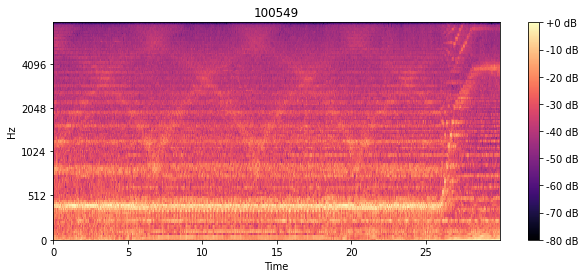

In [29]:
fn = get_audio_path(audio_dir, 100549)

y, sr = librosa.load(fn)
print(len(y), sr)

single_file = fn.split('/')[-1]
genre_name = single_file.split('.')[0]
spect = librosa.feature.melspectrogram(y = y, sr=sr,n_fft = 2048, hop_length = 512)
spect = librosa.power_to_db(spect, ref = np.max)
# spect = np.log(spect)
print(spect.shape, genre_name)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spect, y_axis = 'mel', fmax = 8000, x_axis = 'time')
plt.colorbar(format = '%+2.0f dB')
plt.title(str(genre_name))
plt.show()